In [1]:
%matplotlib inline

import pylab as pl
import numpy as np
import astropy.io.fits as pyfits

from tqdm import tqdm_notebook
import compose_class

fits_dir = "/data/nanli/deepLearning/shared/deepLensingWorkDir/LensFindingChallengeDatasets/GroundBasedTraining/Public"
output_dir = "./outputs/pngs/gri"

In [2]:
'''
    remove masks and rescale images
'''

def preproc_images(imgID):
    ifile = fits_dir + "/Band2/imageSDSS_I-" + str(imgID) + ".fits"
    rfile = fits_dir + "/Band1/imageSDSS_R-" + str(imgID) + ".fits"
    gfile = fits_dir + "/Band3/imageSDSS_G-" + str(imgID) + ".fits"

    img_g = pyfits.getdata(gfile)
    img_g[np.where(img_g==100.0)]=0.0
    
    img_r = pyfits.getdata(rfile)
    img_r[np.where(img_r==100.0)]=0.0
    
    img_i = pyfits.getdata(ifile)
    img_i[np.where(img_i==100.0)]=0.0

    img_rscl = 1e-11
    img_thds = 1e-11

    img_g_rscl = img_g/img_rscl
    img_r_rscl = img_r/img_rscl
    img_i_rscl = img_i/img_rscl
    
    img_g_rscl[np.where(img_g_rscl<=img_thds)] = img_thds
    img_r_rscl[np.where(img_r_rscl<=img_thds)] = img_thds
    img_i_rscl[np.where(img_i_rscl<=img_thds)] = img_thds
    
    return img_g_rscl, img_r_rscl, img_i_rscl

In [3]:
def convert_fits_to_pngs(imgID):
    img_g_rscl, img_r_rscl, img_i_rscl = preproc_images(imgID)

#     scales, offset, Q, alpha, masklevel, saturation, itype = (0.75,1.05,1.5), 0.01, 2.0,0.7, -1.0, 'color', 'rms' # gri 
    scales, offset, Q, alpha, masklevel, saturation, itype = (0.75,1.05,1.5), 0.01, 2.0,0.7, -1.0, 'white', 'sum' # gri    

    outfile = output_dir + "/" + str(imgID) + ".png"

    object_gri = compose_class.channel_gri(img_g_rscl, img_r_rscl, img_i_rscl)
    object_gri.apply_scale(scales=scales)      
    object_gri.lupton_stretch(Q=Q, alpha=alpha, itype=itype)
    object_gri.pjm_mask(masklevel=masklevel)     
    object_gri.pjm_offset(offset=offset)       
    object_gri.lupton_saturate(saturation=saturation)
    object_gri.pack_up()                       
    object_gri.imgRGB.save(outfile) 
    return 0

In [4]:
'''
    convert the first 1000 simulated images to pngs.
'''

imgIDs_arr = 100000 + np.linspace(0,19999,20000).astype('int')

for i in tqdm_notebook(imgIDs_arr[:1000]):
    convert_fits_to_pngs(i)

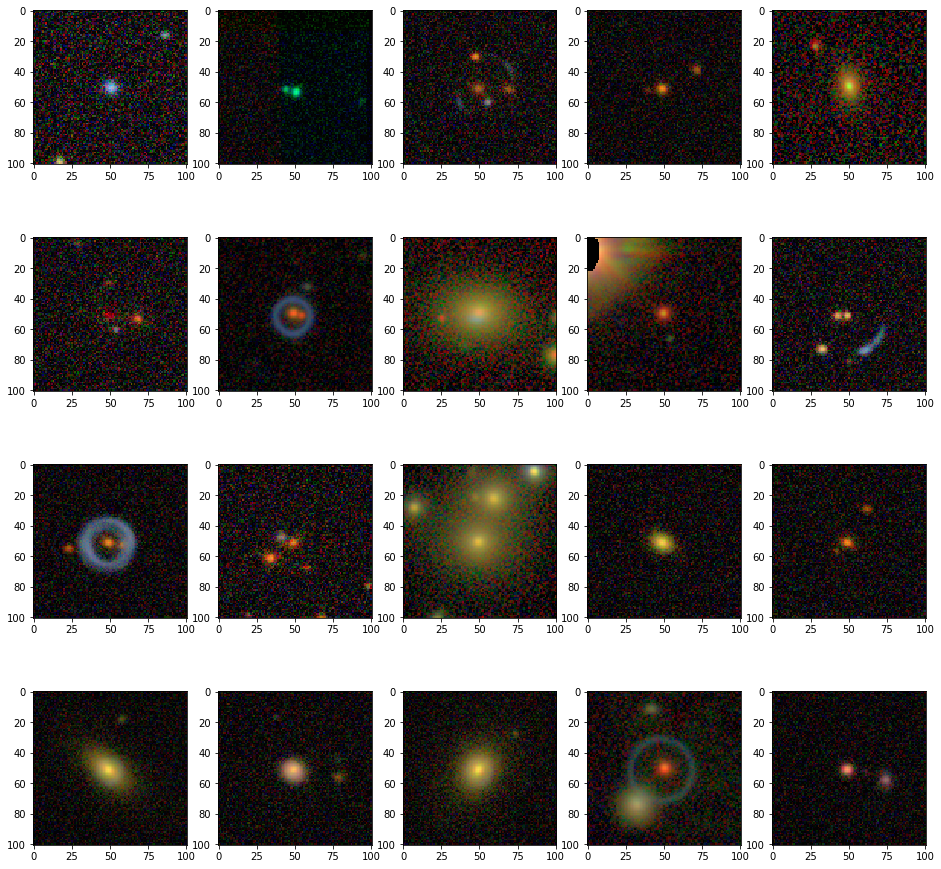

In [5]:
'''
    Randomly choose 20 pngs for visual verification
'''

import matplotlib.image as mpimg
pngIDs = np.random.choice(imgIDs_arr[:1000],20,replace=False)
# pngIDs = imgIDs_arr[:20]
nimgs = len(pngIDs)
pl.figure(figsize=(16,16))
nrows = 4
ncols = 5

for i in range(nrows):
    for j in range(ncols):
        pngID = pngIDs[i*ncols+j]
        img=mpimg.imread(output_dir+'/'+str(pngID)+'.png')
        ax = pl.subplot2grid((4,5), (i,j))
        ax.imshow(img)